In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv('data.csv')

X = data[["radius_mean", "texture_mean", "perimeter_mean",
"area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
"concave points_mean", "symmetry_mean"]]

y = data["diagnosis"]
a = y.shape[0]
print(a)
y1 = []
for i in range(a):
    if y[i] == "M":
        y1 += [1]
    if y[i] == "B":
        y1 += [0]

print(X['radius_mean'].describe(),
X['texture_mean'].describe(),
X['perimeter_mean'].describe(),
X['area_mean'].describe(),
X['smoothness_mean'].describe())

569
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64 count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64 count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64 count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64 count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64


In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y1, test_size=0.25)

X_train = np.array(X_train).reshape(-1, 9).astype(np.float32)
X_test = np.array(X_test).reshape(-1, 9).astype(np.float32)
y_train = np.array(y_train).reshape(-1, 1).astype(np.float32)
y_test = np.array(y_test).reshape(-1, 1).astype(np.float32)





In [33]:
X_train[:5]

array([[1.317e+01, 2.181e+01, 8.542e+01, 5.315e+02, 9.714e-02, 1.047e-01,
        8.259e-02, 5.252e-02, 1.746e-01],
       [1.444e+01, 1.518e+01, 9.397e+01, 6.401e+02, 9.970e-02, 1.021e-01,
        8.487e-02, 5.532e-02, 1.724e-01],
       [2.034e+01, 2.151e+01, 1.359e+02, 1.264e+03, 1.170e-01, 1.875e-01,
        2.565e-01, 1.504e-01, 2.569e-01],
       [1.611e+01, 1.805e+01, 1.051e+02, 8.130e+02, 9.721e-02, 1.137e-01,
        9.447e-02, 5.943e-02, 1.861e-01],
       [1.227e+01, 1.792e+01, 7.841e+01, 4.661e+02, 8.685e-02, 6.526e-02,
        3.211e-02, 2.653e-02, 1.966e-01]], dtype=float32)

In [49]:
model = Sequential([
    keras.Input(shape=(9, )),
    keras.layers.Dense(36, activation = "relu"),
    keras.layers.Dense(36*4, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 36)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 144)            │         5,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,833 (22.79 KB)

 Trainable params: 5,833 (22.79 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
opt = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=opt, loss="BinaryCrossentropy")

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8124
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4491 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5425 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5070 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4382 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4709 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3725 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4598 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4496 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4418 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4295 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3659 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3968 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3877 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [62]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2259  


0.23378777503967285

In [63]:
prediction = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


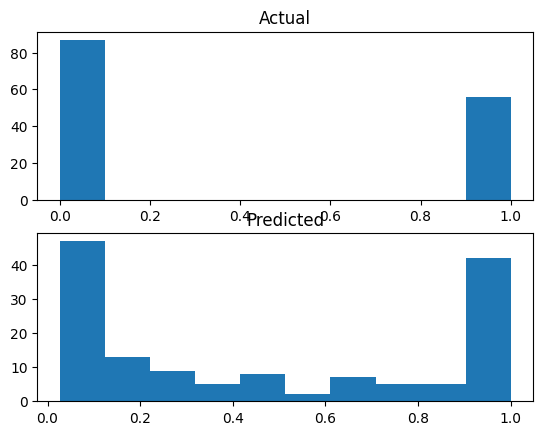

In [64]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(y_test)
ax[0].set_title("Actual")

ax[1].hist(prediction)
ax[1].set_title("Predicted")
plt.show()

In [65]:
for i in range (len(prediction)):
    if prediction[i] >= 0.6:
        prediction[i] = 1
    else:
        prediction[i] = 0
        
# prediction = int(prediction)
prediction = prediction.astype(int)

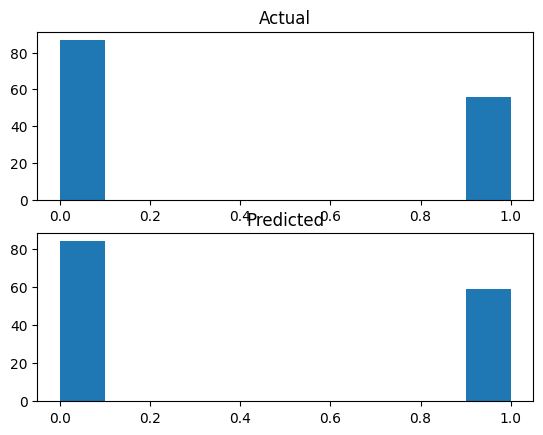

In [66]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(y_test)
ax[0].set_title("Actual")

ax[1].hist(prediction)
ax[1].set_title("Predicted")
plt.show()

In [67]:

print(precision_score(y_test, prediction)) 

print(recall_score(y_test, prediction))

print(f1_score(y_test, prediction))

0.8813559322033898
0.9285714285714286
0.9043478260869565
